# Visualizing Dense layer using ActivationMaximization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keisen/tf-keras-vis/blob/master/examples/visualize_dense_layer.ipynb)
[![Right click and save](https://img.shields.io/badge/Notebook-Open_In_Github-orange.svg)](https://github.com/keisen/tf-keras-vis/blob/master/docs/examples/visualize_dense_layer.ipynb)


Preparation
-----------

### Load libraries

In [1]:
%reload_ext autoreload
%autoreload 2
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline
from packaging.version import parse as version

from tf_keras_vis.utils import num_of_gpus

if version(tf.version.VERSION) < version('2.16.0'):
    import tensorflow.keras as keras
else:
    import keras

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

2025-03-12 12:44:55.732025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741751095.749510    5459 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741751095.754581    5459 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 12:44:55.773420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow recognized 0 GPUs


2025-03-12 12:45:01.797630: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Load keras.Model

In this notebook, we use VGG16 model, however if you want to use other keras.Model, you can do so by modifying the section below.

In [2]:
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Implement functions required to use ActivationMaximization

### Model modifier

When the softmax activation function is applied to the last layer of model, it may obstruct generating the actiation maps, so you should replace the function to a linear activation function. Here, we create and use `ReplaceToLinear` instance.

In [3]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()


# Instead of using ReplaceToLinear instance,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = keras.activations.linear

### Score function

You **MUST** create `Score` instance or define `score function` that returns arbitrary category value. Here, our socre function returns the value corresponding to No.20 (Ouzel) of imangenet.

In [4]:
from tf_keras_vis.utils.scores import CategoricalScore

# 20 is the imagenet index corresponding to Ouzel.
score = CategoricalScore(20)


# Instead of using CategoricalScore object above,
# you can also define the function from scratch as follows:
def score_function(output):
    # The `output` variable refer to the output of the model,
    # so, in this case, `output` shape is `(1, 1000)` i.e., (samples, classes).
    return output[:, 20]

## Visualizing a specific output category

### Create ActivationMaximization Instnace

When `clone` argument is True(default), the `model` will be cloned, so the `model` instance will be NOT modified, however the process may take a while.

In [5]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier=replace2linear, clone=True)

### Visualize

ActivationMaximization will maximize the output of the score function. Here, as a result, we will get a visualized image that maximizes the model output corresponding to the No.20 (Ouzel) of imagenet.

200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 624ms/step - Score: 81.3747 - TotalVariation2D: 7.0657 - Norm: 38.1971 


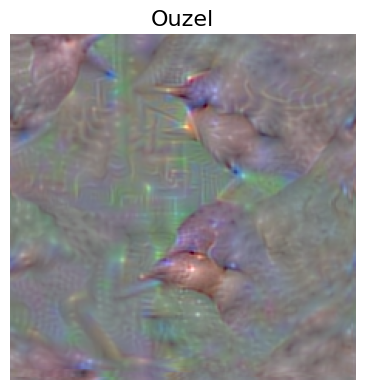

CPU times: user 9min 52s, sys: 34.3 s, total: 10min 26s
Wall time: 2min 4s


In [6]:
%%time
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D

# Generate maximized activation
activations = activation_maximization(score, callbacks=[Progress()])
activations = activations.astype(np.uint8)

# Render
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[0])
ax.set_title('Ouzel', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing specific output categories

Then, let's visualize multiple categories at once!

### Modify Score function

Because change the target you want to visualize, you **MUST** create `Score` instance or define `score function` again that returns arbitrary category values. Here, our socre function returns the values corresponding to No.1 (Goldfish), No.294 (Bear) and No.413 (Assault rifle) of imagenet.

In [7]:
from tf_keras_vis.utils.scores import CategoricalScore

image_titles = ['Goldfish', 'Bear', 'Assault rifle']
scores = CategoricalScore([1, 294, 413])


# Instead of using CategoricalScore object above,
# you can also define the function from scratch as follows:
def score_function(output):
    # The `output` variable refer to the output of the model,
    # so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
    return (output[0, 1], output[0, 294], output[0, 413])

### Create Seed-Input values

And then, you MUST create `seed_input` value. In default, when visualizing a specific output category, tf-keras-vis automatically generates `seed_input` to visualize a image for each model input. When visualizing multiple images, you MUST manually create `seed_input`.

In [8]:
# Create `seed_input` whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

### Visualize

200/200 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - Score: 111.8447 - TotalVariation2D: 6.8333 - Norm: 38.2146


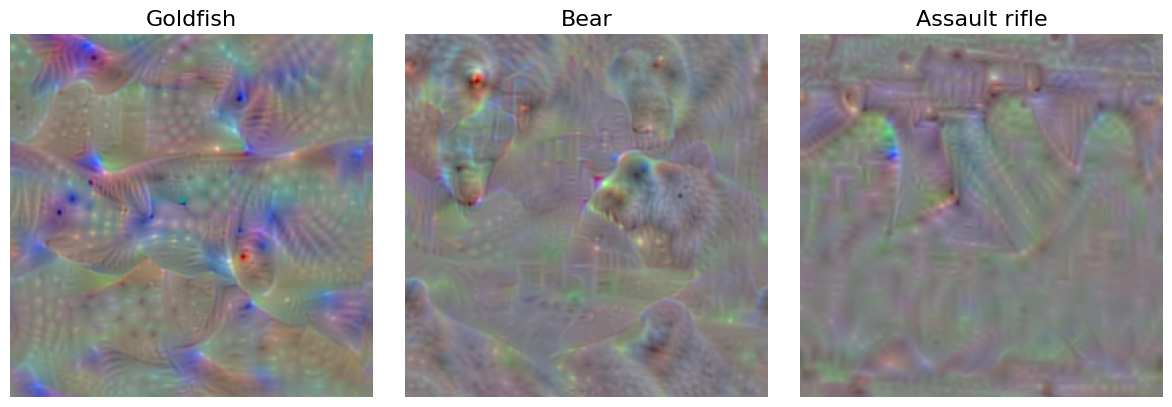

CPU times: user 39min 45s, sys: 1min 34s, total: 41min 19s
Wall time: 6min 41s


In [9]:
%%time

from tf_keras_vis.activation_maximization.callbacks import PrintLogger, Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D

# Generate maximized activation
activations = activation_maximization(scores, seed_input=seed_input, callbacks=[Progress()])
activations = activations.astype(np.uint8)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()